<a href="https://colab.research.google.com/github/VanessaNjoroge/COVID-19-Global-Data-Tracker/blob/main/plp_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks:

Load data using pandas.read_csv().

Check columns: df.columns.

Preview rows: df.head().

Identify missing values: df.isnull().sum().

In [10]:
import pandas as pd
df=pd.read_csv('owid-covid-data.csv')
#print(df.columns)
print(df.head)
#print(df.isnull().sum())

<bound method NDFrame.head of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total

 Data Cleaning

Goal: Prepare data for analysis.

Tasks:

Filter countries of interest (e.g., Kenya, USA, India).

Drop rows with missing dates/critical values.

Convert date column to datetime: pd.to_datetime().

Handle missing numeric values with fillna() or interpolate().

In [7]:
#countries of interest
countries = ["Kenya", "United States", "India"]
df = df[df["location"].isin(countries)]

# Convert date column
df["date"] = pd.to_datetime(df["date"])

# Fill missing values in key columns
df["total_cases"] = df["total_cases"].fillna(0)
df["total_deaths"] = df["total_deaths"].fillna(0)
df["total_vaccinations"] = df["total_vaccinations"].fillna(method="ffill")

<ipython-input-7-e0e0359478e0>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["total_vaccinations"] = df["total_vaccinations"].fillna(method="ffill")


Exploratory Data Analysis (EDA)

Goal: Generate descriptive statistics & explore trends.

**Tasks**:

Plot total cases over time for selected countries.

Plot total deaths over time.

Compare daily new cases between countries.

Calculate the death rate: total_deaths / total_cases.

 Visualizations:
**bold text**
Line charts (cases & deaths over time).

Bar charts (top countries by total cases).

Heatmaps (optional for correlation analysis).

 **Tools**:

matplotlib

seaborn

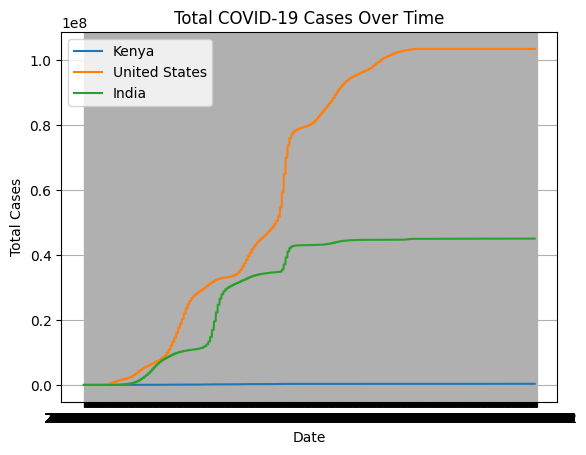

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
for country in countries:
    subset = df[df["location"] == country]
    plt.plot(subset["date"], subset["total_cases"], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()


Visualizing Vaccination Progress

Goal: Analyze vaccination rollouts.

Tasks:

Plot cumulative vaccinations over time for selected countries.

Compare % vaccinated population.

 Charts:

Line charts.

Optional: Pie charts for vaccinated vs. unvaccinated.

Tools:

matplotlib

seaborn

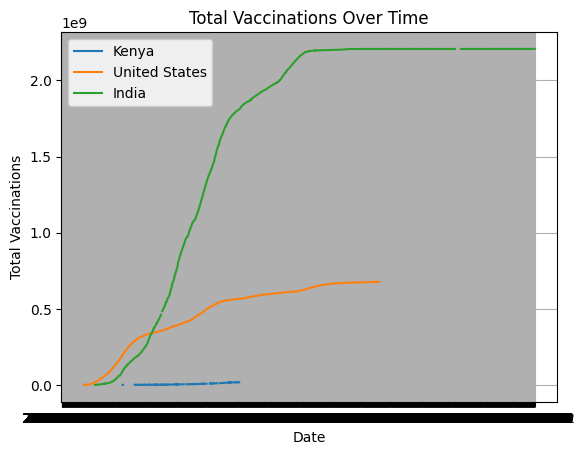

In [12]:
for country in countries:
    subset = df[df["location"] == country]
    plt.plot(subset["date"], subset["total_vaccinations"], label=country)

plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import plotly.express as px

latest = df[df["date"] == df["date"].max()]
fig = px.choropleth(latest, locations="iso_code", color="total_cases",
                    hover_name="location", title="Total COVID-19 Cases by Country")
fig.show()


In [16]:
# Most recent date in dataset
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

# Summary table: Total Cases, Deaths, and Vaccinations
summary = latest_data[['location', 'total_cases', 'total_deaths', 'total_vaccinations']].copy()
summary['death_rate (%)'] = (summary['total_deaths'] / summary['total_cases']) * 100
summary = summary.round(2)
summary.set_index('location', inplace=True)
print("Summary as of")
display(summary)

# Find country with highest death rate
#highest_death_rate = summary['death_rate (%)'].idxmax()
#print(f"\nCountry with the highest death rate: {highest_death_rate} ({summary.loc[highest_death_rate]['death_rate (%)']}%)")

# Find country with highest vaccinations
most_vaccinated = summary['total_vaccinations'].idxmax()
print(f"💉 Country with most total vaccinations: {most_vaccinated} ({int(summary.loc[most_vaccinated]['total_vaccinations'])} doses)")


Summary as of


,total_cases,total_deaths,total_vaccinations,death_rate (%)
location,,,,
Asia,NaN,NaN,9.104305e+09,NaN
Europe,NaN,NaN,1.399334e+09,NaN
European Union (27),NaN,NaN,9.511133e+08,NaN
High-income countries,NaN,NaN,2.840880e+09,NaN
Lithuania,NaN,NaN,4.604865e+06,NaN
Malaysia,NaN,NaN,7.265729e+07,NaN
Upper-middle-income countries,NaN,NaN,5.449981e+09,NaN
World,NaN,NaN,1.357877e+10,NaN


💉 Country with most total vaccinations: World (13578774356 doses)
